## Probabilistic programming

- Using the computer for random experiments
- Very good for understanding
- Also used routinely when providing confidence intervals etc.
- The basis for any Monte-Carlo methods
- Important for any further statistical work including Bayesian data analysis

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

## Probabilistic programming

- What does this mean?

   Can we have a program generate output randomly?

- Can we write a function that generates 0 or 1 randomly
- Such that each occurs often enough?
- Can use the built-in random number generator

In [ ]:
np.random.randint(low=0, high=2, size=50)

## Let us create a 4 sided die

- We write a little function called `tet` to do this

In [ ]:
def tet(size=1):
    return np.random.randint(low=1, high=5, size=size)

In [ ]:
tet(10)

## Uniformly distributed random numbers
- Use `np.random.random`: RVs in the range (0, 1)


In [ ]:
np.random.random(5)

In [ ]:
# size can be any shape.
np.random.random((3, 3))

In [ ]:
x = np.random.random(size=10000)

In [ ]:
plt.hist(x, bins='auto', density=True);

### Exercise

- Generate Random variates in the region (-1, 1) using `np.random.random`?

In [6]:
# Solution
np.random.random((2, 3))
#enerate Random variates in the region (-1, 1) using `np.random.random`?
2 * np.random.random((2, 3)) - 1


array([[-0.22855718, -0.63084133, -0.7744793 ],
       [-0.47018483,  0.50960592, -0.09612325]])

## Normally distributed random numbers

- Use `np.random.normal`

In [ ]:
x = np.random.normal(loc=0.0, scale=1.0, size=10000)

In [ ]:
plt.hist(x, bins='auto', density=True);

## How does the computer generate a random number?

- Are they really random?
- How do you tell?
- First let us think about how you can tell?

- You need to see how the numbers are distributed

In [ ]:
x = np.random.random(10000)
plt.hist(x, density=True);

In [ ]:
x1 = np.linspace(0, 1, 10000)
plt.hist(x1, density=True);

## What is going on?

- How can you tell the difference?
- Clearly histograms are not enough
- The numbers must not be correlated!
- In the case of `x1`, given one number we know the next (all the rest)

## Pseudo RNG

- Computer generates pseudo random numbers
- Not really random but pretty much indistinguishable
- Pseudo-random number generators are non-trivial
- Don't write own without doing lots of research

## But we want repeatability!

- Important thing about computers!
- Reliable, repeatable
- Easier to debug, no randomness

## `random.seed` to the rescue

- Use `random.seed(number)` to set the seed

In [ ]:
np.random.random(5)

In [ ]:
np.random.seed(123)
np.random.random(5)

## Using `np.choice`


In [ ]:
events = [0, 1]
np.random.choice(events, size=20)

In [ ]:
# Can also do this!
events = ['H', 'T']
np.random.choice(events, size=20)

### The case of a biased coin


In [ ]:
np.random.choice(events, size=100, p=[0.1, 0.9])

This is useful even when sampling at random from some data.
For example:

In [ ]:
data = range(900, 1000)
np.random.choice(data, size=10)

In [ ]:
# Without replacement
np.random.choice(data, size=10, replace=False)

## Other useful functions
- `np.random.permutation`
- `np.random.shuffle`

In [9]:
data = np.random.randint(0, 5, size=5)
data

array([0, 2, 0, 1, 3], dtype=int32)

In [ ]:
np.random.shuffle(data)

In [10]:
np.random.permutation(10)

array([8, 2, 9, 3, 5, 0, 7, 6, 1, 4], dtype=int32)

## Other distributions
So far we have seen:

- `randint`: integers uniformly distributed
- `random`: uniformly distributed (0, 1)
- `normal`: Normally distributed (defaults: 0 mean, 1 variance)

These all provide samples from such a distribution.

There are many more distributions that numpy provides we look at a few.


In [11]:
# Discrete RV.
np.random.binomial(10, 0.25, size=10)

array([5, 1, 2, 4, 2, 3, 3, 4, 3, 3], dtype=int32)

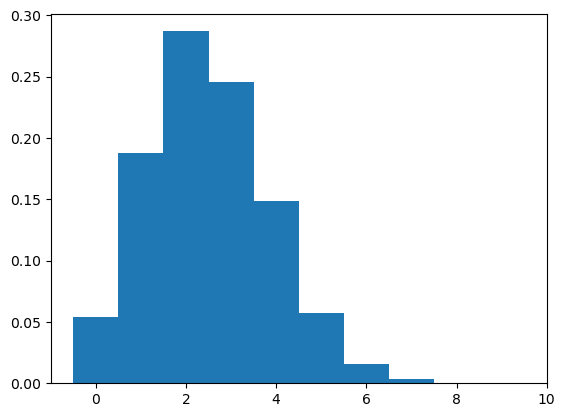

In [12]:
data = np.random.binomial(10, 0.25, size=10000)
# Note the parameters!
plt.hist(data, bins=range(11), density=True, align='left');

In [ ]:
# A continuous distribution, the Beta distribution
data = np.random.beta(2, 2, size=10000)
plt.hist(data, bins='auto', density=True);

In [ ]:
# The Standard T distribution
n = 10000
data_t = np.random.beta(10, size=n)
data_n = np.random.normal(size=n)
plt.hist((data_t, data_n), bins='auto', density=True);

## Using `scipy.stats`

- `np.random.xxx` provides random variates, or draws samples from a given
  distribution.
- `scipy.stats` provides a lot more conveniences.
- The [SciPy Stats
  reference](https://docs.scipy.org/doc/scipy/reference/stats.html) is worth
  checking out!
- The various distributions are objects which provide among other things:
  - `rvs()` - random variates
  - `pdf, cdf, mean, median, fit` etc.
  - `ppf` - inverse of the `cdf` etc.

This is very useful to understand a given distribution or use it for study.
Here is an example that we can study.

In [15]:
from scipy.stats import norm, binom, poisson
from ipywidgets import interact

In [16]:
def plot_binom(n, p):
    rv = binom(n, p)
    x = np.arange(0, n+1)
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
    # Compare with a normal distribution
    mu, sigma = n*p, np.sqrt(n*p*(1-p))
    x1 = np.linspace(0, n+1)
    plt.plot(x1, norm.pdf(x1, loc=mu, scale=sigma), 'g--')

In [17]:
interact(plot_binom, n=(1, 100), p=(0.01, 0.99));

interactive(children=(IntSlider(value=50, description='n', min=1), FloatSlider(value=0.5, description='p', max…

Here is an example with a Poisson distribution.

In [ ]:
def plot_poisson(lam=4):
    rv = poisson(lam)
    min, max = rv.ppf(0.0001), rv.ppf(0.9999999999)
    x = np.arange(min, max)
    plt.plot(x, norm.pdf(x, loc=lam, scale=np.sqrt(lam)), 'g--')
    plt.plot(x, rv.pmf(x), 'bo')
    plt.vlines(x, 0, rv.pmf(x), colors='b', alpha=0.5, lw=5)
    plt.xlim(0, 50)


interact(plot_poisson, lam=(0.0, 100));

Here is an example with a T distribution.

In [ ]:
from scipy.stats import t

def plot_t(n=1):
    rv = t(n)
    x = np.linspace(-5, 5, 200)
    #plt.figure(figsize=(20, 10))
    plt.plot(x, norm.pdf(x), 'g--')
    plt.plot(x, rv.pdf(x))


interact(plot_t, n=(1, 50));

## Why is this useful?

- Can understand and study these distributions.
- Allows you to construct experiments with random variables.
- Can numerically explore very interesting and important questions.
- Gateway to look at [Monte-Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method)!

- Such methods can defeat the curse of dimensionality!

Let us look at a few practical(?) examples. :)

### Volume estimation

- Calculate the area of a sphere in d dimensions.
- We consider a single quadrant, so in 2-D we multiply by $2^d$
- Throw uniformly distributed points and see which fall inside the sphere.


In [ ]:
x = np.random.random((5, 2))
x

In [ ]:
np.linalg.norm(x)

In [ ]:
np.linalg.norm(x, axis=1)

In [ ]:
np.linalg.norm(x, axis=1) < 1.0

In [ ]:
n = 100000
(np.linalg.norm(np.random.random((n, 2)), axis=1) < 1).sum()/n*2**2


- This will work as you increase the number of dimensions.
- Impossibly hard to do with normal numerical integration.

### Statistical computations

- Given Sachin's (or Virat Kohli's if you prefer) scores in our `data/`
  directory.
- Let us say he is going to play in a ODI series of 5 games.
- Estimate what you think he will score on average with an 80% confidence
  interval.

In [ ]:
# Live solution and discussion.


As you can see we can answer some profound practical questions using this
sort of approach.